In [9]:
%pip install "pandas[excel]" matplotlib seaborn

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   --------- ------------------------------ 71.7/294.6 kB 2.0 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.6 kB 2.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.6 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

consumi = pd.read_csv("...", delimiter=";",  decimal=',')
print(consumi.shape)

(914, 101)


In [2]:
consumi["Data Consumo"] = pd.to_datetime(consumi["Data Consumo"], dayfirst=True)
consumi["Nr Utente"] = consumi["Nr Utente"].astype(object)
print(consumi.dtypes)


Nr Utente                       object
Grandezza                       object
Consumo Giorno (Kwh)             int64
Q1 (kWh)                       float64
Q2 (kWh)                       float64
                             ...      
Q94 (kWh)                      float64
Q95 (kWh)                      float64
Q96 (kWh)                      float64
PIVA_CF | POD                   object
Data Consumo            datetime64[ns]
Length: 101, dtype: object


In [3]:
#consumi = consumi.drop(["Nr Utente", "Grandezza", "PIVA_CF | POD"], axis=1, inplace=True)
consumi = consumi.set_index("Data Consumo")
consumi.head(3)

,Nr Utente,Grandezza,Consumo Giorno (Kwh),Q1 (kWh),Q2 (kWh),Q3 (kWh),Q4 (kWh),Q5 (kWh),Q6 (kWh),Q7 (kWh),...,Q88 (kWh),Q89 (kWh),Q90 (kWh),Q91 (kWh),Q92 (kWh),Q93 (kWh),Q94 (kWh),Q95 (kWh),Q96 (kWh),PIVA_CF | POD
Data Consumo,,,,,,,,,,,,,,,,,,,,,
2021-03-01,379296122,ATTIVA,650,3.40,3.375,3.35,3.250,3.450,3.400,3.200,...,5.10,4.975,4.925,4.90,4.650,4.600,4.750,4.475,4.475,80019600925 | IT001E98654326
2021-03-02,379296122,ATTIVA,736,4.55,4.100,4.55,4.450,4.125,4.475,4.525,...,5.00,4.675,4.750,4.75,4.475,4.525,4.450,4.300,4.875,80019600925 | IT001E98654326
2021-03-03,379296122,ATTIVA,758,4.40,4.450,4.40,4.775,4.575,4.500,4.725,...,4.85,4.975,4.450,4.35,4.450,4.625,4.275,4.475,4.400,80019600925 | IT001E98654326


In [4]:
stat_consumi = consumi.describe(include=["int64","float64"])
stat_consumi

,Consumo Giorno (Kwh),Q1 (kWh),Q2 (kWh),Q3 (kWh),Q4 (kWh),Q5 (kWh),Q6 (kWh),Q7 (kWh),Q8 (kWh),Q9 (kWh),...,Q87 (kWh),Q88 (kWh),Q89 (kWh),Q90 (kWh),Q91 (kWh),Q92 (kWh),Q93 (kWh),Q94 (kWh),Q95 (kWh),Q96 (kWh)
count,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,...,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000
mean,576.155361,3.871023,3.838591,3.846381,3.845049,3.840625,3.833003,3.825086,3.833823,3.826305,...,4.221291,4.209334,4.167752,4.110885,4.120975,4.106951,3.995051,3.909963,3.876952,3.880453
std,179.613208,0.788376,0.778977,0.787320,0.778456,0.788975,0.781035,0.782798,0.790686,0.829694,...,0.891186,0.875754,0.896925,0.908588,0.909255,0.911402,0.847060,0.790079,0.793671,0.800573
min,253.000000,2.275000,2.275000,2.300000,2.199000,2.000000,2.200000,2.200000,2.300000,0.000000,...,2.450000,2.225000,2.300000,2.250000,2.200000,2.375000,2.250000,2.275000,2.300000,2.200000
25%,399.250000,3.275000,3.225000,3.275000,3.256250,3.250000,3.250000,3.225000,3.206250,3.225000,...,3.525000,3.550000,3.476000,3.375000,3.400000,3.381250,3.375000,3.325000,3.275000,3.275000
50%,601.500000,3.800000,3.775000,3.775000,3.775000,3.800000,3.775000,3.775000,3.775000,3.775000,...,4.200000,4.175000,4.087500,4.000000,4.050000,4.000000,3.875000,3.800000,3.775000,3.800000
75%,719.000000,4.418750,4.375000,4.399750,4.400000,4.375000,4.399750,4.375000,4.400000,4.400000,...,4.850000,4.825000,4.800000,4.800000,4.800000,4.775000,4.600000,4.468750,4.400000,4.425000
max,1005.000000,6.600000,6.175000,6.575000,6.350000,6.400000,6.775000,6.375000,6.500000,7.700000,...,7.025000,6.875000,7.000000,6.900000,6.975000,6.825000,6.676000,6.775000,6.450000,6.475000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

c:\Users\manzu\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Data Consumo'>

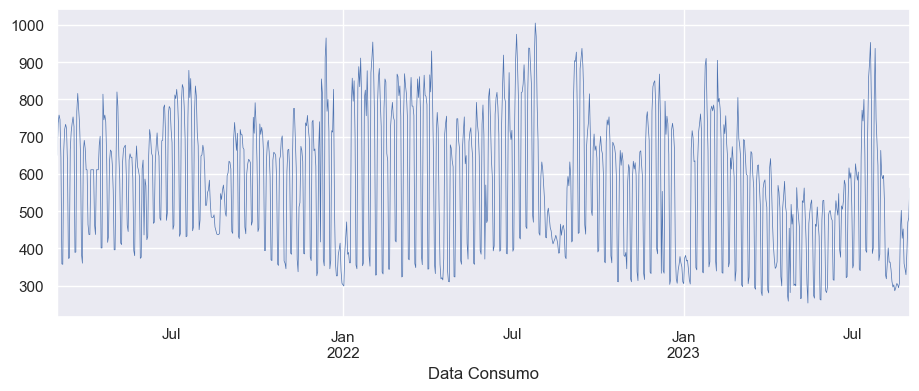

In [11]:
consumi["Consumo Giorno (Kwh)"].plot(linewidth=0.5)

In [12]:
consumi_2021 = consumi.loc["2021-03-01":"2021-12-31"]
consumi_2021.shape

(306, 100)

In [6]:
consumi_2022 = consumi.loc["2022-01-01":"2022-12-31"]
consumi_2022.shape

(365, 100)

In [14]:
consumi_2023 = consumi.loc["2023-01-01":"2023-08-31"]
consumi_2023.shape

(243, 100)

<Axes: xlabel='Data Consumo'>

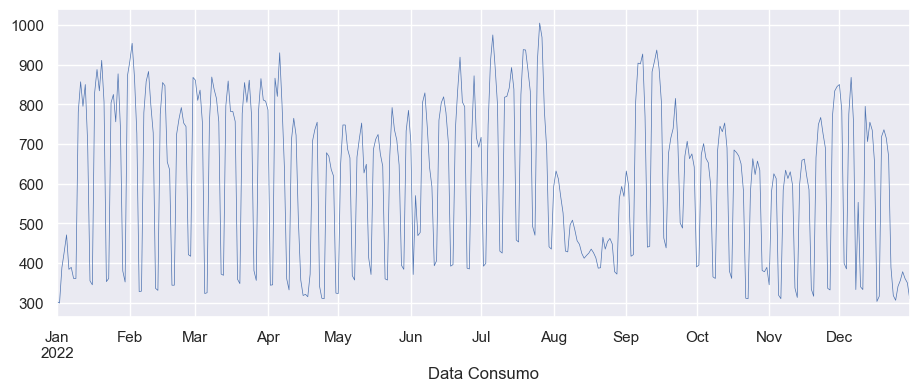

In [15]:
consumi_2022["Consumo Giorno (Kwh)"].plot(linewidth=0.5)

In [7]:
stat_2022 = consumi_2022.describe(include=["int64","float64"])
stat_2022

,Consumo Giorno (Kwh),Q1 (kWh),Q2 (kWh),Q3 (kWh),Q4 (kWh),Q5 (kWh),Q6 (kWh),Q7 (kWh),Q8 (kWh),Q9 (kWh),...,Q87 (kWh),Q88 (kWh),Q89 (kWh),Q90 (kWh),Q91 (kWh),Q92 (kWh),Q93 (kWh),Q94 (kWh),Q95 (kWh),Q96 (kWh)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,609.241096,3.878274,3.858055,3.866195,3.860504,3.861422,3.845534,3.833529,3.850121,3.846973,...,4.270962,4.271093,4.204175,4.150460,4.159647,4.124644,3.958759,3.885751,3.881647,3.882411
std,198.040572,0.619323,0.618678,0.622853,0.614501,0.617690,0.619514,0.612991,0.614145,0.664134,...,0.746497,0.719348,0.738364,0.773332,0.747690,0.760214,0.652436,0.630610,0.616940,0.626514
min,299.000000,2.574000,2.700000,2.600000,2.675000,2.550000,2.574000,2.575000,2.575000,0.000000,...,2.500000,2.775000,2.575000,2.550000,2.600000,2.625000,2.675000,2.600000,2.625000,2.550000
25%,394.000000,3.425000,3.401000,3.400000,3.425000,3.400000,3.401000,3.400000,3.400000,3.375000,...,3.775000,3.775000,3.700000,3.574000,3.600000,3.525000,3.500000,3.425000,3.425000,3.425000
50%,653.000000,3.775000,3.775000,3.775000,3.775000,3.775000,3.750000,3.750000,3.775000,3.750000,...,4.226000,4.225000,4.125000,4.075000,4.075000,4.075000,3.825000,3.775000,3.775000,3.800000
75%,779.000000,4.200000,4.225000,4.175000,4.225000,4.200000,4.200000,4.225000,4.200000,4.200000,...,4.700000,4.650000,4.650000,4.600000,4.625000,4.625000,4.325000,4.226000,4.225000,4.175000
max,1005.000000,5.525000,5.700000,5.650000,5.550000,5.775000,5.650000,5.775000,5.775000,7.050000,...,6.425000,6.375000,6.575000,6.475000,6.325000,6.275000,6.050000,5.900000,5.975000,6.075000


C:\Users\manzu\AppData\Local\Temp\ipykernel_27120\2432787348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumi_2022['Mese'] = consumi_2022.index.month


<Axes: xlabel='Mese', ylabel='Consumo Giorno (Kwh)'>

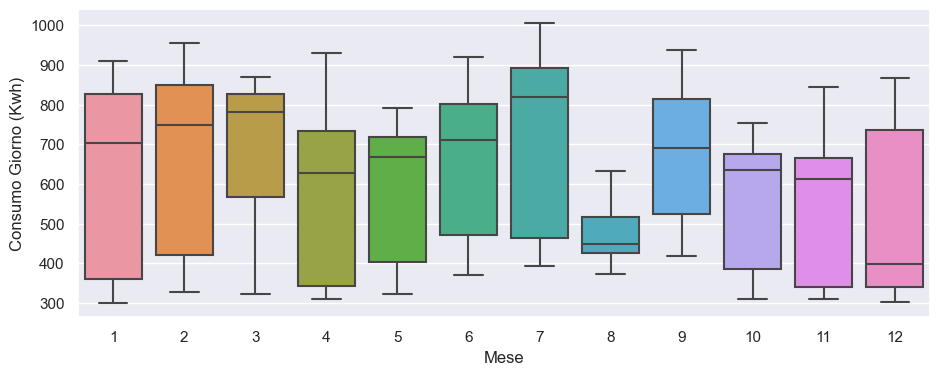

In [8]:
consumi_2022['Mese'] = consumi_2022.index.month
sns.boxplot(data=consumi_2022, x="Mese", y="Consumo Giorno (Kwh)")


Text(0, 0.5, 'kWh')

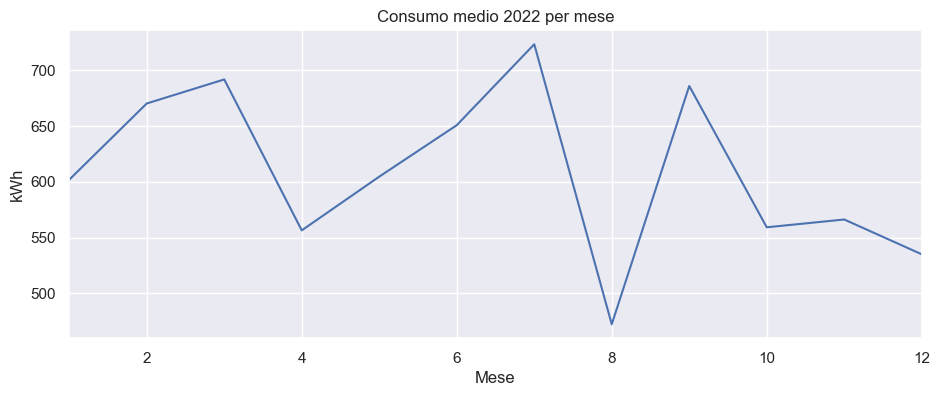

In [9]:
media2022_per_mese = consumi_2022.groupby("Mese").mean()
media2022_per_mese["Consumo Giorno (Kwh)"].plot(grid="on")
plt.xlim([1,12])
plt.title("Consumo medio 2022 per mese")
plt.ylabel("kWh")

C:\Users\manzu\AppData\Local\Temp\ipykernel_27120\930839581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumi_2022['Giorno della Settimana'] = consumi_2022.index.day_name()


Text(0.5, 1.0, 'Consumo annuo (2022) per giorni della settimana')

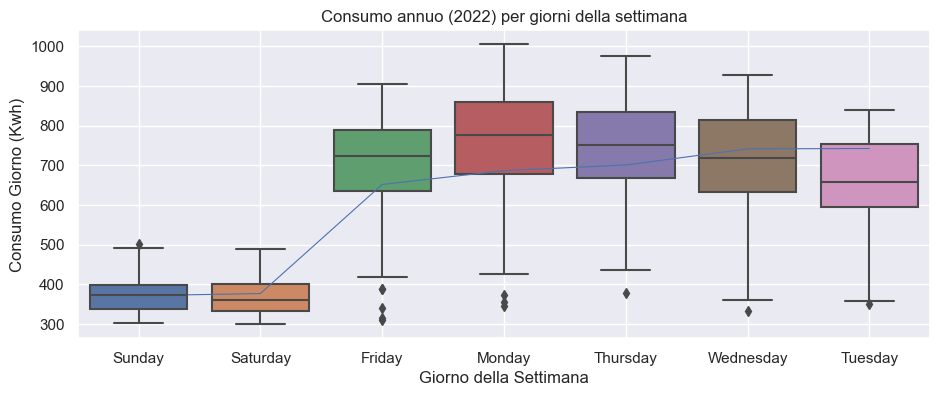

In [10]:
consumi_2022['Giorno della Settimana'] = consumi_2022.index.day_name()
sns.boxplot(data=consumi_2022, x="Giorno della Settimana", y="Consumo Giorno (Kwh)")
media2022_per_giorno = consumi_2022.groupby("Giorno della Settimana").mean().sort_values(by="Consumo Giorno (Kwh)", axis=0)
media2022_per_giorno["Consumo Giorno (Kwh)"].plot(linewidth=0.8)
plt.title("Consumo annuo (2022) per giorni della settimana")


In [11]:
dettagli_consumi2022 = consumi_2022.loc[:, "Q1 (kWh)":"Q96 (kWh)"]#.plot(linewidth=0.8)
#dettagli_consumi2022.plot()

Text(0.5, 1.0, "Consumo annuo (2022) per quarti d'ora")

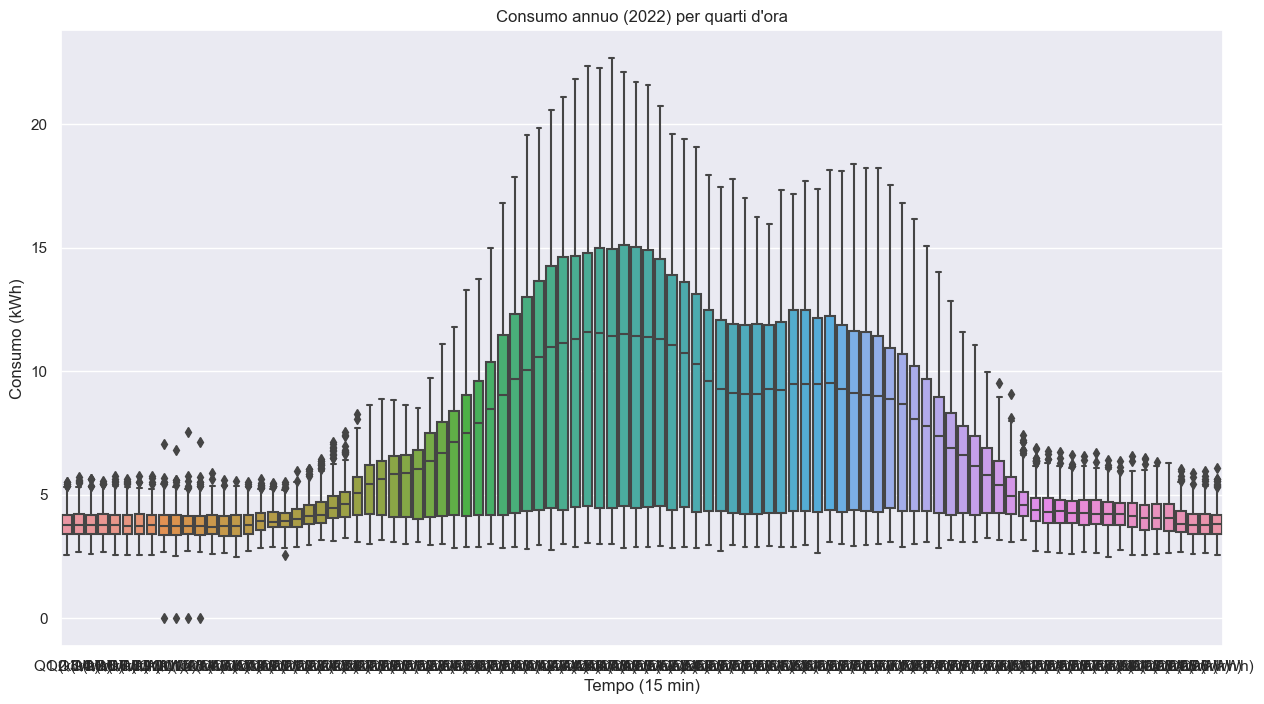

In [12]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(data=dettagli_consumi2022)
plt.xlabel("Tempo (15 min)")
plt.ylabel("Consumo (kWh)")
plt.title("Consumo annuo (2022) per quarti d'ora")

In [13]:
consumi_x_15min = dettagli_consumi2022.sum(axis=0)
picco_max = consumi_x_15min.max()
q_picco_max = consumi_x_15min.idxmax()

from datetime import time

def convert_q(q):
    q = int(q.lstrip("Q").rstrip(" (kWh)"))
    ora = q//4
    if ora == 24:
        ora = 0
        minuti = 0
    else:
        minuti = int(((q/4 - ora) / 0.25 ) * 15)
    orario = time(ora,minuti)
    
    return orario

print(f"Picco massimo complessivo annuo di {picco_max} kWh ottenuto nella fascia oraria delle {convert_q(q_picco_max)}")

Picco massimo complessivo annuo di 3784.678 kWh ottenuto nella fascia oraria delle 11:30:00


Text(0, 0.5, 'Potenza media (kWh)')

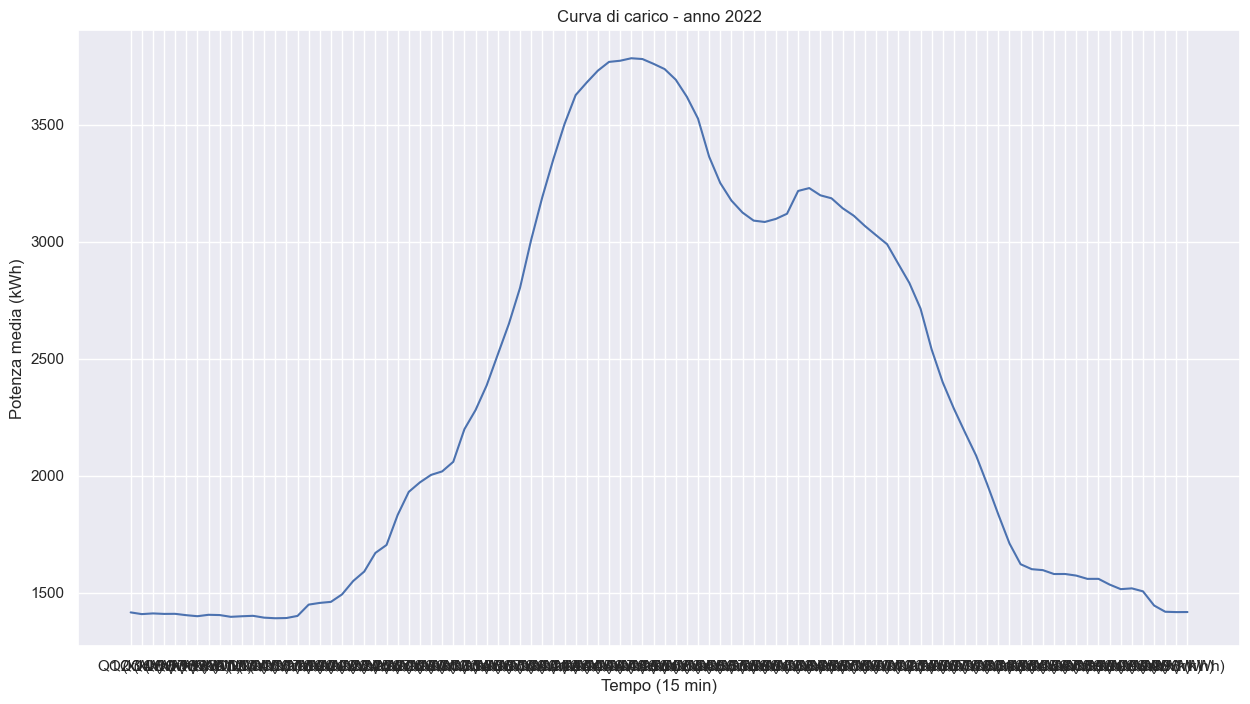

In [56]:
p = sns.lineplot(data=consumi_x_15min)
p.set_title("Curva di carico - anno 2022")
p.set_xlabel("Tempo (15 min)")
p.set_ylabel("Potenza media (kWh)")

In [57]:
df_consumi_x_15min = pd.DataFrame(columns=["Potenza media"], data=consumi_x_15min).sort_values(by=['Potenza media'], ascending = False)
df_consumi_x_15min["Durata"] = [i for i in range(1,97)]
df_consumi_x_15min["Percentuale"] = (df_consumi_x_15min["Durata"]*100)/96

df_consumi_x_15min

,Potenza media,Durata,Percentuale
Q46 (kWh),3784.678,1,1.041667
Q47 (kWh),3781.343,2,2.083333
Q45 (kWh),3774.025,3,3.125000
Q44 (kWh),3769.094,4,4.166667
Q48 (kWh),3760.876,5,5.208333
...,...,...,...
Q11 (kWh),1399.044,92,95.833333
Q10 (kWh),1396.604,93,96.875000
Q13 (kWh),1393.070,94,97.916667
Q15 (kWh),1391.444,95,98.958333


Text(0, 0.5, 'Potenza media (kWh)')

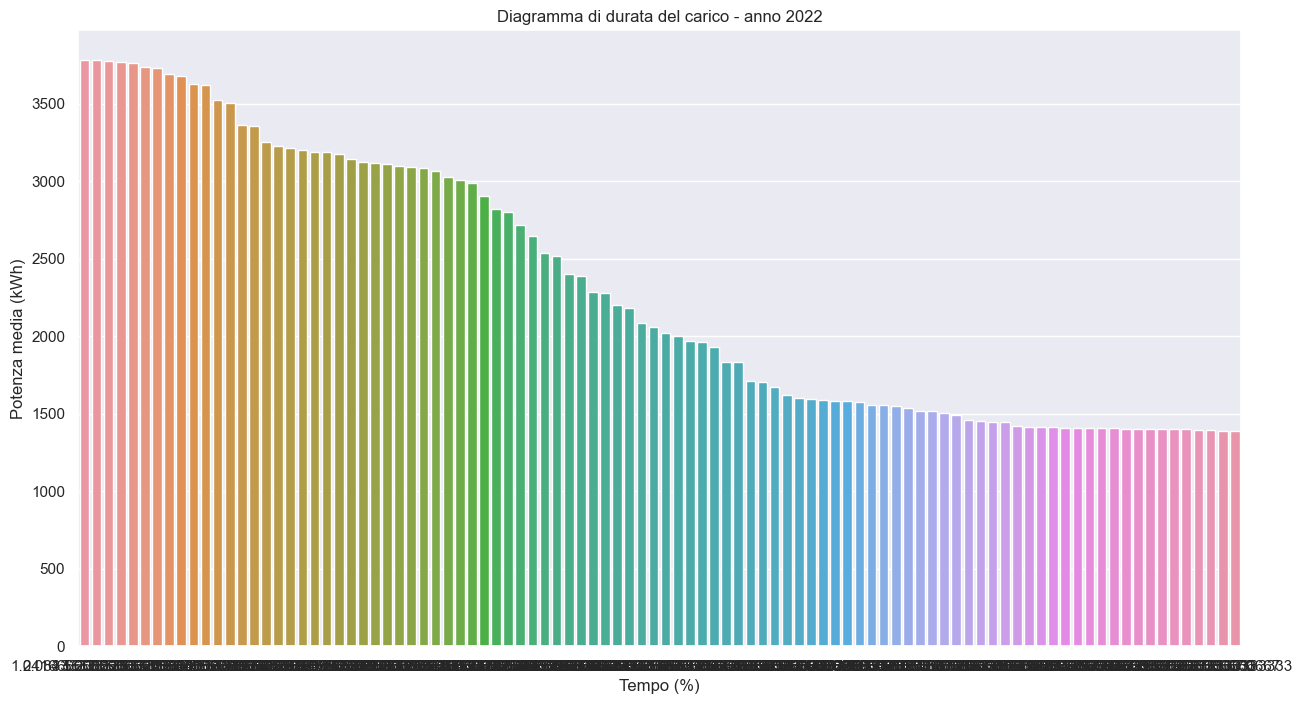

In [59]:
p = sns.barplot(data=df_consumi_x_15min, x = "Percentuale", y="Potenza media")
p.set_title("Diagramma di durata del carico - anno 2022")
p.set_xlabel("Tempo (%)")
p.set_ylabel("Potenza media (kWh)")

In [ ]:
#consumi_2022 = consumi_2022.drop(["Nr Utente", "Grandezza", "PIVA_CF | POD"], axis=1)
consumi_2022
consumi['Mese'] = consumi.index.month
consumi['Giorno della Settimana'] = consumi.index.day_name()
consumi = consumi.drop(["Nr Utente", "Grandezza", "PIVA_CF | POD"], axis=1)



In [66]:
consumi

consumi_q_orari = consumi.loc[:, "Q1 (kWh)":"Q96 (kWh)"]

consumi_q_orari




,Q1 (kWh),Q2 (kWh),Q3 (kWh),Q4 (kWh),Q5 (kWh),Q6 (kWh),Q7 (kWh),Q8 (kWh),Q9 (kWh),Q10 (kWh),...,Q87 (kWh),Q88 (kWh),Q89 (kWh),Q90 (kWh),Q91 (kWh),Q92 (kWh),Q93 (kWh),Q94 (kWh),Q95 (kWh),Q96 (kWh)
Data Consumo,,,,,,,,,,,,,,,,,,,,,
2021-03-01,3.400,3.375,3.350,3.250,3.450,3.400,3.200,3.425,3.550,3.425,...,5.200,5.100,4.975,4.925,4.900,4.650,4.600,4.750,4.475,4.475
2021-03-02,4.550,4.100,4.550,4.450,4.125,4.475,4.525,4.400,4.300,4.375,...,5.075,5.000,4.675,4.750,4.750,4.475,4.525,4.450,4.300,4.875
2021-03-03,4.400,4.450,4.400,4.775,4.575,4.500,4.725,4.425,4.775,4.400,...,4.925,4.850,4.975,4.450,4.350,4.450,4.625,4.275,4.475,4.400
2021-03-04,4.525,4.400,4.425,4.300,4.725,4.575,4.050,4.425,4.650,4.325,...,5.225,5.225,5.225,4.525,5.025,5.025,4.575,4.950,4.825,4.975
2021-03-05,4.725,4.775,4.775,4.650,4.950,4.850,4.425,4.800,4.750,4.700,...,4.050,4.075,4.000,3.625,3.600,3.825,3.550,3.550,3.500,3.675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27,3.275,3.200,3.300,2.925,3.275,3.225,3.325,3.125,2.975,2.800,...,3.175,3.825,3.525,3.450,3.500,3.525,3.450,3.250,3.325,3.250
2023-08-28,3.200,3.150,3.325,3.000,3.175,3.250,3.150,2.949,2.825,2.725,...,3.625,3.625,3.150,3.300,3.325,3.475,3.125,3.500,3.400,3.275
2023-08-29,2.974,3.075,3.075,2.901,3.050,3.025,3.050,2.650,3.075,3.075,...,3.425,3.400,3.300,3.425,3.350,3.150,3.425,3.550,3.300,3.225


In [80]:
def somma_consumo_orario(df):
    h=0
    sum_list = []
    for i in range(0,96,4):
        h+=1
        i+=4
        #print(i,i-4, h)
        sum_list.append(df.iloc[:,i-4:i].sum(axis=1))
        df[str(h)] = df.iloc[:,i-4:i].sum(axis=1)
    return df.loc[:,"1":"24"]
        

consumi_orari = somma_consumo_orario(consumi_q_orari)
consumi_orari['Mese'] = consumi_orari.index.month
consumi_orari['Giorno della Settimana'] = consumi_orari.index.day_name()
consumi_orari.to_csv("consumi_orari_PdS.csv")

In [95]:
consumi_inverno_21_22 = consumi_orari.loc["2021-12-21":"2022-03-20",:]
#consumi_inverno_21_22["Totale giornaliero"] = consumi_inverno_21_22.sum(axis=1)
consumi_inverno_21_22.shape

consumi_primavera_22 = consumi_orari.loc["2022-03-21":"2022-06-20", :]
#consumi_primavera_22["Totale giornaliero"] = consumi_primavera_22.sum(axis=1)
consumi_primavera_22.shape

consumi_estate_22 = consumi_orari.loc["2022-06-21":"2022-09-20", :]
#consumi_estate_22["Totale giornaliero"] = consumi_estate_22.sum(axis=1)
consumi_estate_22.shape

consumi_autunno_22 = consumi_orari.loc["2022-09-21":"2022-12-20", :]
#consumi_autunno_22["Totale giornaliero"] = consumi_autunno_22.sum(axis=1)
consumi_autunno_22.shape

consumi_inverno_22_23 = consumi_orari.loc["2022-12-21":"2023-03-20", :]
#consumi_inverno_22_23["Totale giornaliero"] = consumi_inverno_22_23.sum(axis=1)
consumi_inverno_22_23

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,Mese,Giorno della Settimana
Data Consumo,,,,,,,,,,,,,,,,,,,,,
2022-12-21,15.475,15.149,15.250,15.625,15.800,17.375,24.125,32.199,44.250,48.725,...,42.850,40.799,30.375,22.675,18.575,17.025,17.450,16.950,12,Wednesday
2022-12-22,16.475,16.750,16.875,15.375,16.924,18.850,22.750,26.650,36.775,42.650,...,41.800,39.100,29.000,18.125,15.725,14.650,14.374,13.375,12,Thursday
2022-12-23,13.075,13.150,13.550,13.025,14.250,15.025,14.450,17.625,21.000,21.550,...,18.950,19.225,16.325,16.350,12.900,12.775,12.575,12.725,12,Friday
2022-12-24,12.875,12.599,12.125,11.500,14.775,14.675,14.575,14.500,13.350,13.375,...,13.750,14.200,14.500,14.825,11.375,11.550,11.350,11.000,12,Saturday
2022-12-25,10.875,11.075,10.925,11.350,13.725,14.400,13.850,13.575,13.200,13.175,...,13.575,13.600,14.950,14.275,10.975,11.225,11.050,11.375,12,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-16,13.050,12.725,12.400,12.825,14.200,15.650,21.875,24.524,35.075,39.999,...,39.875,32.700,23.725,19.675,11.475,11.425,10.825,11.275,3,Thursday
2023-03-17,10.900,11.150,11.075,10.750,12.350,12.800,16.700,25.999,34.650,41.874,...,33.900,30.475,24.725,19.950,14.450,12.600,10.750,11.175,3,Friday
2023-03-18,10.775,11.200,10.900,11.375,12.300,12.775,11.950,11.524,11.275,11.600,...,14.825,15.000,15.875,14.575,13.999,12.600,11.225,10.825,3,Saturday


Text(0.5, 1.0, 'Consumo orario medio - Inverno 2021/22')

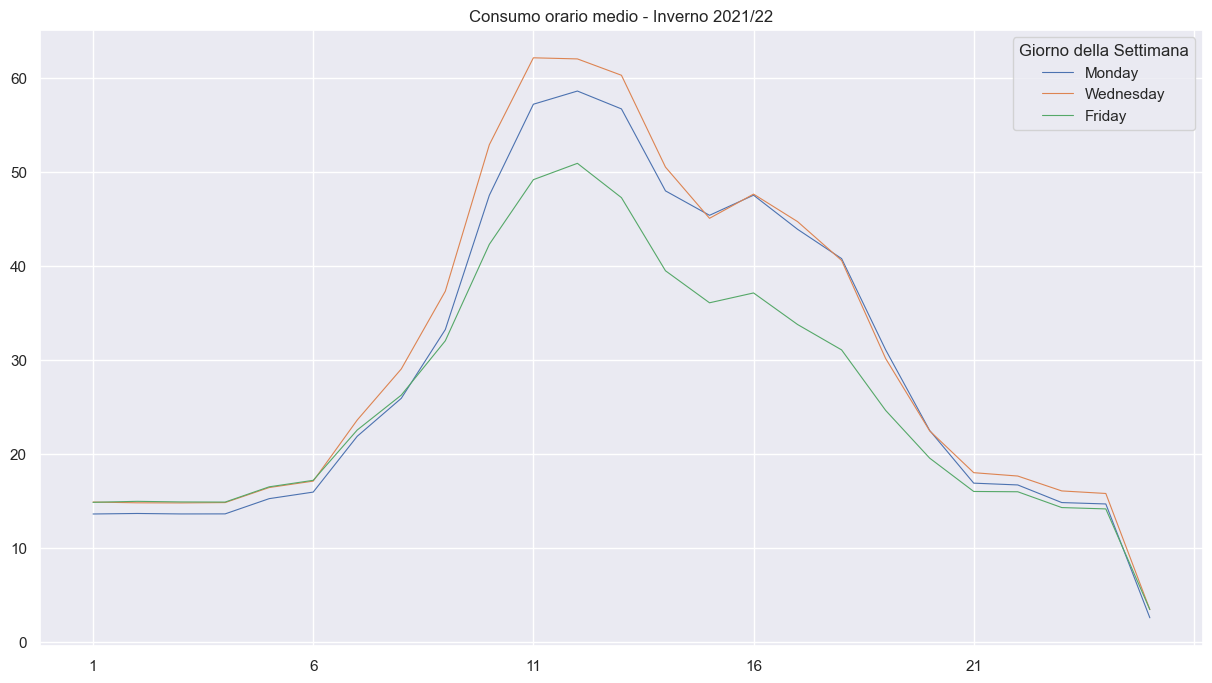

In [98]:
media_per_giorno_inverno_21_22 = consumi_inverno_21_22.groupby("Giorno della Settimana").mean().T
media_per_giorno_inverno_21_22.to_csv("Consumo_orario_medio_Inverno_21_22.csv")

media_per_giorno_inverno_21_22.loc[:, ["Monday","Wednesday", "Friday"]].plot(linewidth=0.8)
plt.title("Consumo orario medio - Inverno 2021/22")

In [ ]:
media_per_giorno_primavera_22 = consumi_primavera_22.groupby("Giorno della Settimana").mean().T
media_per_giorno_primavera_22.to_csv("Consumo_orario_medio_Primavera_22.csv")

media_per_giorno_estate_22 = consumi_estate_22.groupby("Giorno della Settimana").mean().T
media_per_giorno_estate_22.to_csv("Consumo_orario_medio_Estate_22.csv")

media_per_giorno_autunno_22 = consumi_autunno_22.groupby("Giorno della Settimana").mean().T
media_per_giorno_autunno_22.to_csv("Consumo_orario_medio_Autunno_22.csv")

totale_per_giorno_inverno_22_23 = consumi_inverno_22_23.groupby("Giorno della Settimana").mean().T
totale_per_giorno_inverno_22_23.to_csv("Consumo_orario_totale_Inverno_22_23.csv")

Text(0.5, 1.0, 'Consumo orario totale - Inverno 2021/22')

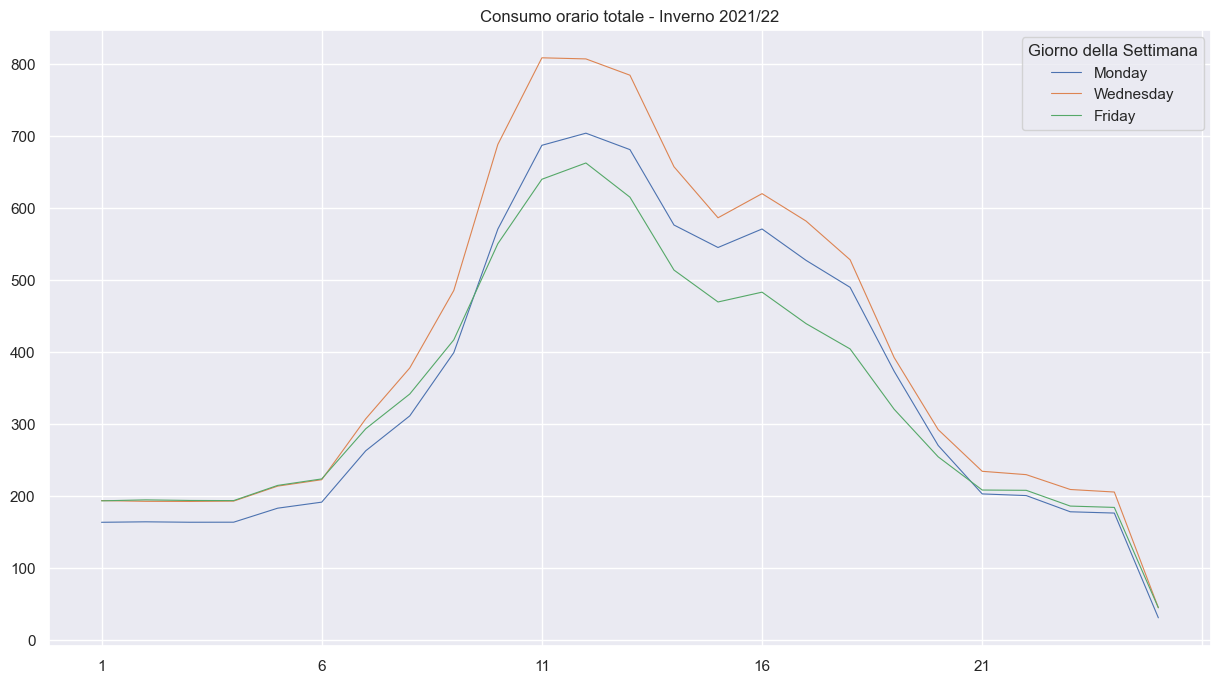

In [99]:
totale_per_giorno_inverno_21_22 = consumi_inverno_21_22.groupby("Giorno della Settimana").sum().T
totale_per_giorno_inverno_21_22.to_csv("Consumo_orario_totale_Inverno_21_22.csv")

totale_per_giorno_inverno_21_22.loc[:, ["Monday","Wednesday", "Friday"]].plot(linewidth=0.8)
plt.title("Consumo orario totale - Inverno 2021/22")